In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df= pd.read_csv("IRIS.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

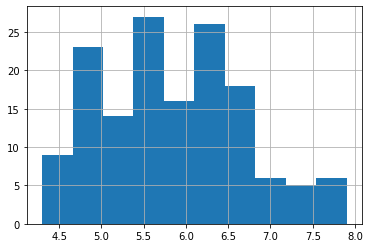

In [9]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

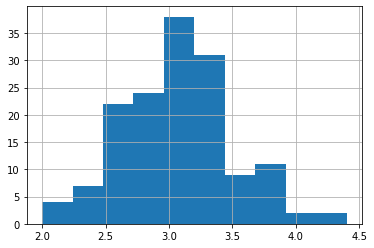

In [10]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

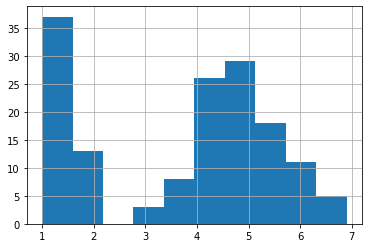

In [11]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

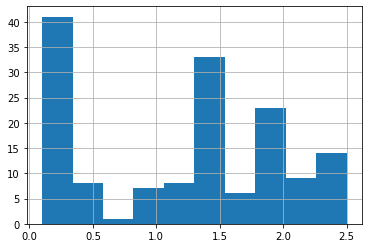

In [12]:
df['PetalWidthCm'].hist()

In [13]:
colors=['red','orange','blue']
species =['Iris-setosa','Iris-versicolor','Iris-virginica']


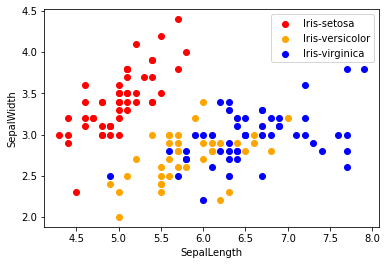

In [14]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'],c=colors[i], label=species[i])
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

    

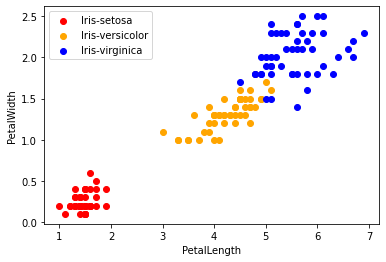

In [15]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'],c=colors[i], label=species[i])
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()


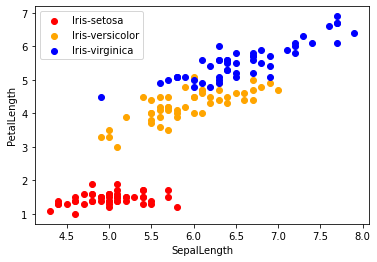

In [16]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'],c=colors[i], label=species[i])
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()


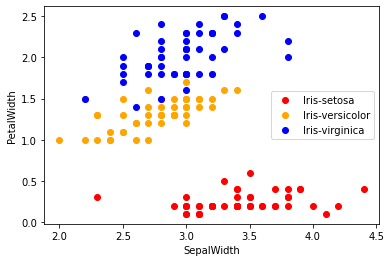

In [17]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'],c=colors[i], label=species[i])
plt.xlabel('SepalWidth')
plt.ylabel('PetalWidth')
plt.legend()

In [18]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

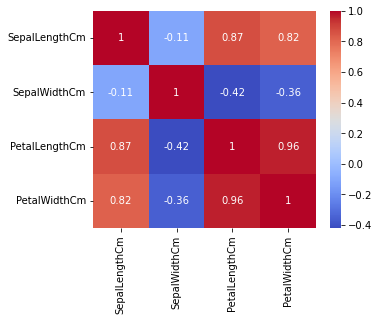

In [19]:
corr=df.corr()
fig, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True,ax=ax ,cmap='coolwarm')

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.30)

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [24]:
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [26]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()

In [27]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 

In [30]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777
